In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets

In [2]:
iris=datasets.load_iris()
x=iris.data
y=iris.target

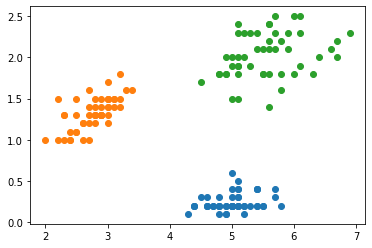

In [3]:
plt.scatter(x[y==0,0],x[y==0,3])
plt.scatter(x[y==1,1],x[y==1,3])
plt.scatter(x[y==2,2],x[y==2,3])
plt.scatter(x[y==3,3],x[y==3,3])

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
y_pred=GaussianMixture(n_components=3,random_state=42).fit_predict(x)

C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [6]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id



In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

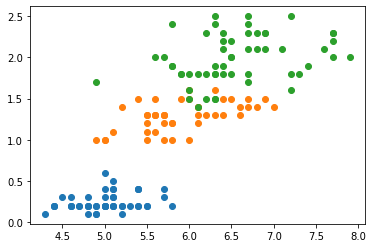

In [9]:
plt.scatter(x[y_pred==0,0],x[y_pred==0,3])
plt.scatter(x[y_pred==1,0],x[y_pred==1,3])
plt.scatter(x[y_pred==2,0],x[y_pred==2,3])


In [10]:
np.sum(y_pred==y) / len(y_pred)


0.9666666666666667

# K_MEANS

In [11]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X,y=make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std)

In [13]:
X.shape

(2000, 2)

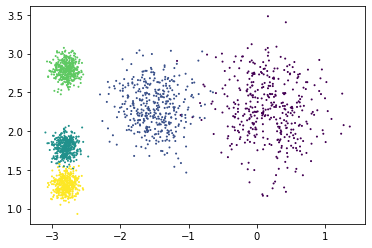

In [14]:
plt.scatter(X[:,0],X[:,1],c=y,s=1)

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans=KMeans(n_clusters=5,random_state=42)
y_pred=kmeans.fit_predict(X)

In [17]:
y_pred

array([1, 3, 3, ..., 2, 3, 4])

In [18]:
kmeans.cluster_centers_


array([[ 0.1942524 ,  2.27672447],
       [-2.80135248,  1.30714305],
       [-2.78227543,  2.79035765],
       [-1.47554953,  2.31188441],
       [-2.79172256,  1.7991641 ]])

In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

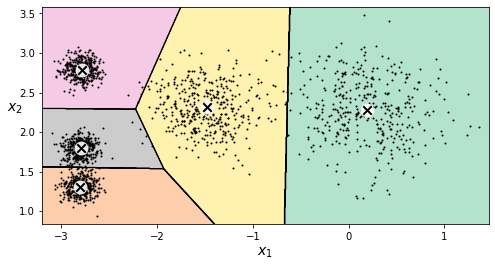

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [21]:
k_means_iter1=KMeans(n_clusters=5,random_state=42,max_iter=1)
k_means_iter3=KMeans(n_clusters=5,random_state=42,max_iter=5)
k_means_iter10=KMeans(n_clusters=5,random_state=42,max_iter=10)

In [22]:
pred1=k_means_iter1.fit_predict(X)
pred3=k_means_iter3.fit_predict(X)
pred10=k_means_iter10.fit_predict(X)

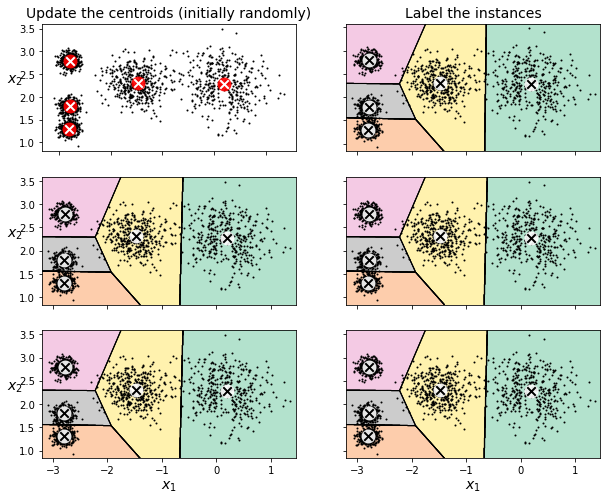

In [23]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(k_means_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(k_means_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(k_means_iter3, X, show_centroids=False, show_xlabels=False)
plot_centroids(k_means_iter3.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(k_means_iter3, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(k_means_iter10, X, show_centroids=False)
plot_centroids(k_means_iter10.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(k_means_iter10, X, show_ylabels=False)

plt.show()

In [24]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1316: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


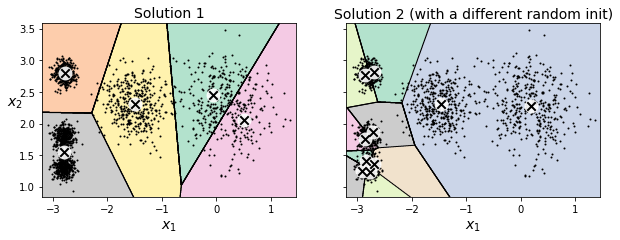

In [25]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=10, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

In [26]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

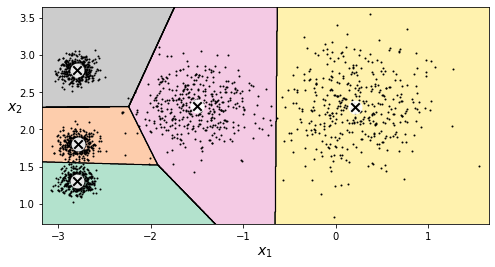

In [27]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [28]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

228.02009759864595

# Mini Batch Kmeans

In [29]:
from sklearn.cluster import MiniBatchKMeans

In [30]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)


MiniBatchKMeans(n_clusters=5, random_state=42)

In [31]:
minibatch_kmeans.inertia_

228.03262781607754

In [32]:
import urllib.request as request
from sklearn.datasets import fetch_openml

In [33]:
mnist=fetch_openml("mnist_784",as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [35]:
def load_batch(batch_size):
    return X[np.random.choice(len(X),batch_size,replace=False)]

In [36]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None
for init in range(n_init):
    minibatch_kmeans=MiniBatchKMeans(n_clusters=k,init_size=init_size)
    x_batch=load_batch(batch_size)
    minibatch_kmeans.partial_fit(x_batch)
    minibatch_kmeans.sum_inertia_=0
    for iteration in range(n_iterations):
        x_batch=load_batch(batch_size)
        minibatch_kmeans.partial_fit(x_batch)
        if iteration>iteration-evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_+=minibatch_kmeans.inertia_
    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans
        

        

C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warning

In [37]:
best_kmeans.score(X)


-228.1280544177976

In [38]:
from timeit import timeit


In [39]:

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

22/100

KeyboardInterrupt: 

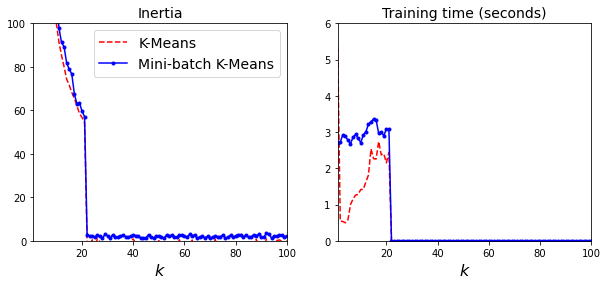

In [40]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

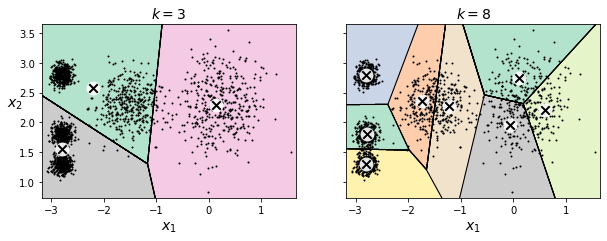

In [41]:
kmean3=KMeans(n_clusters=3,random_state=42)
kmeans8=KMeans(n_clusters=8,random_state=42)
plot_clusterer_comparison(kmean3,kmeans8,X,"$k=3$", "$k=8$")

In [42]:
print(kmean3.inertia_)
print(kmeans8.inertia_)

642.8525191584182
128.15948138936602


In [43]:
kmeans_k=[KMeans(n_clusters=k,random_state=42).fit(X) for k in range(1,10)]
inertia=[model.inertia_ for model in kmeans_k]

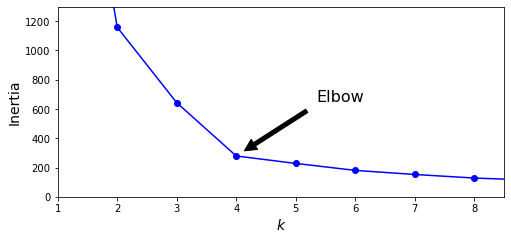

In [44]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertia, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertia[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

# Silouhette score

$$ (b - a) / max(a, b)$$

In [45]:
from sklearn.metrics import silhouette_score

In [46]:
silhouette_score(X,kmeans.labels_)

0.6495986857026385

In [47]:
silhouette_scores=[silhouette_score(X,model.labels_) for model in kmeans_k[1:]]

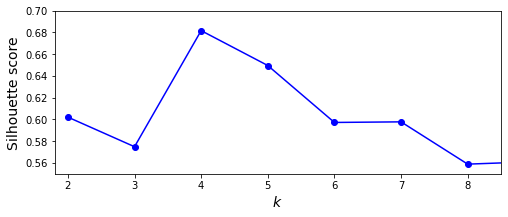

In [48]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

In [49]:
import os 

In [53]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
images_path="DataSets/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
request.urlretrieve(url, os.path.join(images_path, filename))

('DataSets/ladybug.png', <http.client.HTTPMessage at 0x19a8c382400>)

In [54]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [55]:
segmented_img=[]
X=image.reshape(-1,3)
n_colors=[1,2,3,5,10]
for cluster in n_colors:
    segmented=KMeans(n_clusters=cluster,random_state=42).fit(X)
    segmented_images=segmented.cluster_centers_[segmented.labels_]
    segmented_img.append(segmented_images.reshape(image.shape))

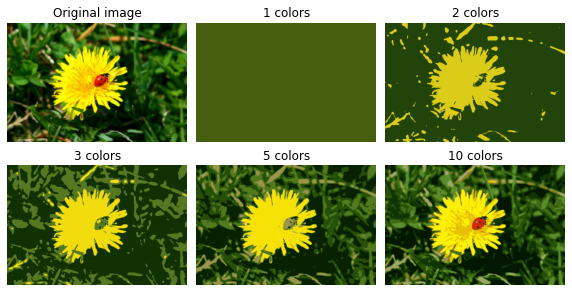

In [56]:

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_img[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

## Using Clustering as preprocessing

In [76]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

In [77]:
x,y=load_digits(return_X_y=True)

In [78]:
from sklearn.model_selection import train_test_split


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [61]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [62]:
log_reg.score(x_test,y_test)

0.9688888888888889

In [63]:
from sklearn.pipeline import Pipeline

In [64]:
pipline=Pipeline([("kmeans",KMeans(n_clusters=50,random_state=42).fit(x_train)),
                 ("log_reg",LogisticRegression(multi_class="ovr",solver="lbfgs",max_iter=5000,random_state=42))])

In [65]:
pipline.fit(x_train,y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [66]:
pipline.score(x_test,y_test)

0.9777777777777777

In [67]:
from sklearn.model_selection import GridSearchCV


In [68]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipline, param_grid, cv=3, verbose=2)
grid_clf.fit(x_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.1s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans_

KeyboardInterrupt: 

In [143]:
grid_clf.best_params_

{'kmeans__n_clusters': 57}

In [144]:
grid_clf.best_score_

0.9665924276169265

In [145]:
grid_clf.score(x_test,y_test)

0.98

In [147]:
kmeans = KMeans(n_clusters=50, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

## Using clustering in Semi Supervised Learning

In [127]:
n_labeled=50

In [128]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(x_train[:n_labeled], y_train[:n_labeled])
log_reg.score(x_test, y_test)

0.8333333333333334

In [129]:
k=50

In [130]:
kmeans=KMeans(n_clusters=k,random_state=42)
x_min_distance=kmeans.fit_transform(x_train)

In [131]:
min_distance=np.argmin(x_min_distance,axis=0)
X_representive_digits=x_train[min_distance]

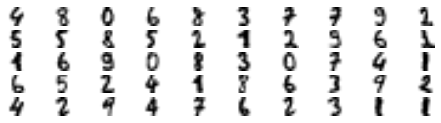

In [132]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representive_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')
plt.show()

In [133]:
y_digits=y_train[min_distance]
y_digits

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [122]:
log_reg=LogisticRegression()
log_reg.fit(X_representive_digits,y_digits)

C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [123]:
log_reg.score(x_test,y_test)

0.92

In [124]:
y_train_propagated=np.empty(len(x_train),dtype=np.float32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i]=y_digits[i]


In [137]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(x_train,y_train_propagated)
log_reg.score(x_test,y_test)

0.9333333333333333

In [138]:
percentile_closest = 75
X_cluster_dist=x_min_distance[np.arange(len(x_train)),kmeans.labels_]
for i in range(k):
    in_cluster=(kmeans.labels_==i)
    cluster_dist=X_cluster_dist[in_cluster]
    cutoff_distance=np.percentile(cluster_dist,percentile_closest)
    above_cutoff=(X_cluster_dist>cutoff_distance)
    X_cluster_dist[in_cluster&above_cutoff]=-1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = x_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [140]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg.score(x_test,y_test)

0.9355555555555556

# DBSCAN

In [54]:
from sklearn.datasets import make_moons

In [15]:
x,y=make_moons(n_samples=2000,random_state=42,noise=0.05)

In [16]:
from sklearn.cluster import DBSCAN

In [18]:
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=0.05)

In [19]:
dbscan.labels_[:10]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [20]:
dbscan.core_sample_indices_[:10]
dbscan.components_[:3]


array([[ 1.84124118,  0.13471068],
       [ 0.42119378,  0.91306492],
       [ 0.49765397, -0.34217336]])

In [22]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(x)


DBSCAN(eps=0.2)

In [23]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

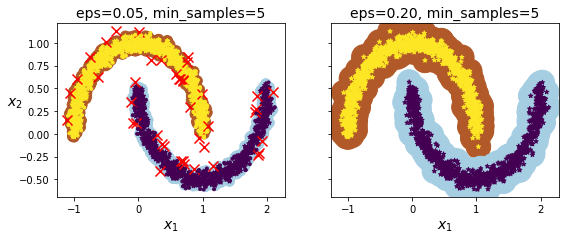

In [26]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, x, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, x, size=600, show_ylabels=False)

plt.show()

In [27]:
dbscan=dbscan2

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan2.labels_)

KNeighborsClassifier(n_neighbors=50)

In [32]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [33]:
knn.predict_proba(X_new)

array([[0.16, 0.84],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

NameError: name 'save_fig' is not defined

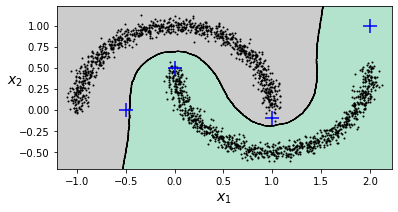

In [37]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, x, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

# Gaussian Mixture Model

In [5]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [6]:
from sklearn.mixture import GaussianMixture

In [7]:
gm=GaussianMixture(n_components=3,n_init=10)

In [8]:
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [9]:
gm.covariances_

array([[[ 1.14296668, -0.03114176],
        [-0.03114176,  0.9545003 ]],

       [[ 0.63496849,  0.7298512 ],
        [ 0.7298512 ,  1.16112807]],

       [[ 0.6890309 ,  0.79717058],
        [ 0.79717058,  1.21367348]]])

In [10]:
gm.means_

array([[ 3.40196611,  1.05838748],
       [-1.40754214,  1.42716873],
       [ 0.05224874,  0.07631976]])

In [11]:
gm.weights_

array([0.2093669 , 0.40008962, 0.39054348])

In [12]:
gm.n_iter_

4

In [13]:
gm.predict(X)

array([2, 2, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
gm.predict_proba(X)

array([[2.27715290e-02, 6.79898914e-07, 9.77227791e-01],
       [1.60345103e-02, 6.77104389e-04, 9.83288385e-01],
       [1.90251273e-06, 9.99922915e-01, 7.51824662e-05],
       ...,
       [9.99999565e-01, 2.17938894e-26, 4.35053542e-07],
       [1.00000000e+00, 1.50679490e-41, 5.27837047e-16],
       [1.00000000e+00, 8.21915701e-41, 2.32355608e-15]])

In [15]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999271592

In [16]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

NameError: name 'save_fig' is not defined

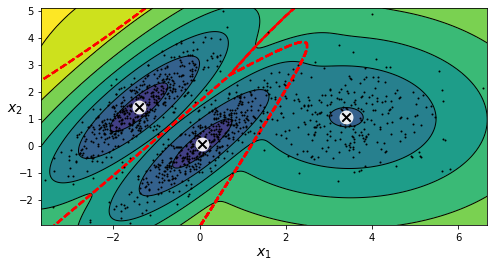

In [17]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

In [18]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [19]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

NameError: name 'save_fig' is not defined

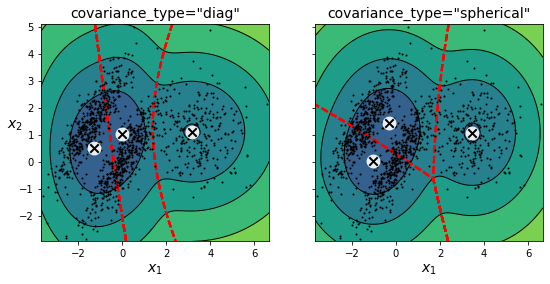

In [20]:
compare_gaussian_mixtures(gm_diag, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

$$BIC = log (m)p − 2 log (Lˆ)$$
$$AIC = 2p − 2 log (Lˆ)$$

In [21]:
gm.bic(X)

8189.662685850679

In [22]:
gm.aic(X)

8102.437405735641

In [26]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_likelyhood=gm.score(X)*len(X)
bic=np.log(len(X))*n_params-2*max_likelyhood
aic=2*n_params-2*max_likelyhood

In [27]:
bic,aic

(8189.662685850679, 8102.437405735641)

In [28]:
gm_models=[GaussianMixture(n_components=k,n_init=10,random_state=42).fit(X) for k in range(1,11)]

In [29]:
bics=[gm_model.bic(X) for gm_model in gm_models]
aics=[gm_model.aic(X) for gm_model in gm_models]

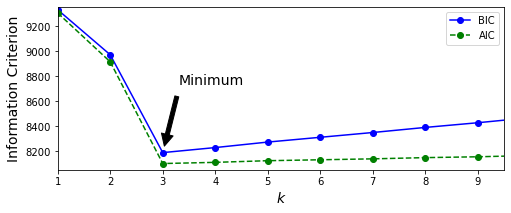

In [30]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [32]:
min_bic=np.infty
for k in range(1,11):
    for covariance in ["full", "tied", "spherical", "diag"]:
        bic=GaussianMixture(n_components=k,covariance_type=covariance,random_state=42,n_init=10).fit(X).bic(X)
        if bic<min_bic:
            min_bic=bic
            best_k=k
            best_cov=covariance

In [33]:
best_k

3

In [34]:
best_cov

'full'

# Baysian Gaussian mixture model

In [35]:
from sklearn.mixture import BayesianGaussianMixture

In [43]:
bgm=BayesianGaussianMixture(n_components=10,n_init=10,random_state=42)

In [44]:
bgm.fit(X)

C:\Users\alibidaran\anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

In [45]:
np.round(bgm.weights_,2)

array([0.4 , 0.  , 0.  , 0.  , 0.39, 0.2 , 0.  , 0.  , 0.  , 0.  ])

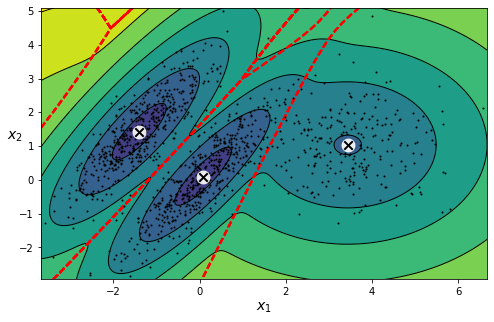

In [46]:
plt.figure(figsize=(8,5))
plot_gaussian_mixture(bgm,X)

In [56]:
Bgm_low=BayesianGaussianMixture(n_components=10,n_init=1,weight_concentration_prior=0.01,max_iter=1000)
Bgm_high=BayesianGaussianMixture(n_components=10,n_init=1,weight_concentration_prior=1000,max_iter=1000)
nn = 73
Bgm_low.fit(X[:nn])
Bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10,
                        weight_concentration_prior=1000)

In [57]:
np.round(Bgm_low.weights_,2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [58]:
np.round(Bgm_high.weights_, 2)

array([0.01, 0.01, 0.01, 0.11, 0.43, 0.01, 0.37, 0.01, 0.01, 0.01])

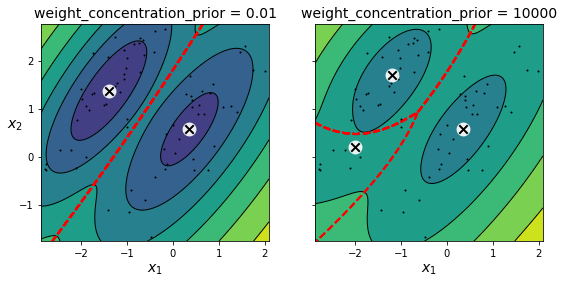

In [59]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(Bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(Bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)
plt.show()

In [55]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [63]:
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

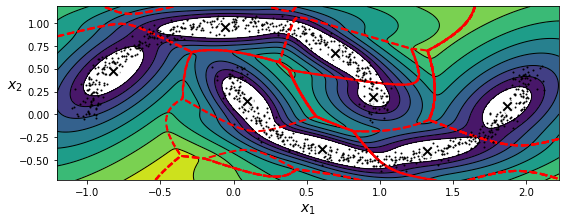

In [66]:
plt.figure(figsize=(9,3.2))
plot_gaussian_mixture(bgm,X_moons,show_ylabels=True)